# Calculating S^2 matrix representation

In [1]:
%load_ext autoreload
%autoreload 2
# provide cell timings
%load_ext autotime
from qdef import *
%config Completer.use_jedi = False
%config InlineBackend.figure_format = 'retina'
import sympy as sp
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matrixgoodies import *
from uncertainties import ufloat
from misc import *
plot_style = 'default'
plt.style.use(plot_style)
import copy
from collections import Counter
import sys

Reloading /Users/juan/ZiaLab/Codebase/qdef/data/CPGs.pkl ...


In [2]:
from itertools import permutations

In [3]:
def carrousel(dim):
    orders = []
    for shift in range(dim):
        orders.append(np.roll(np.arange(dim),-shift))
    return orders

In [4]:
from functools import reduce

In [110]:
# def S_squared(num_electrons:int):
#     '''
#     This function returns the matrix representation of S^2 in 
#     the uncoupled basis.
#     Parameters
#     ----------
#     num_electrons (int)   : how many electrons
#     Returns
#     -------
#     S_squared_matrix (sp.Matrix) : S_x^2 + S_y^2 + S_z^2
#     '''
#     s_e_matrices = Jmatrices(S_HALF)
#     chunks = []
#     for se_matrix in s_e_matrices:
#         id = sp.eye(2)
#         orderings = carrousel(num_electrons)
#         S_squared_parts = []
#         train = [se_matrix]+[id]*(num_electrons-1)
#         for ordering in orderings:
#             ordered_train = [train[idx] for idx in ordering]
#             op = reduce(TensorProduct, ordered_train)
#             S_squared_parts.append(op)
#         zero_matrix = sp.zeros(op.rows)
#         S_not_squared = sum(S_squared_parts, zero_matrix)
#         S_squared_component = S_not_squared * S_not_squared
#         chunks.append(S_squared_component)
#     S_squared_matrix = sum(chunks, zero_matrix)
#     print(num_electrons)
#     return S_squared_matrix

In [5]:
# from joblib import Parallel, delayed
# import multiprocessing
# num_cores = multiprocessing.cpu_count()
# print('Num cores = %d' % num_cores)

In [6]:
# J_squared_tuple = Parallel(n_jobs = num_cores)(delayed(J_squared)(n) for n in range(1,10))

In [7]:
# num_electrons = 3
# s_e_matrices = Jmatrices(S_HALF)
# chunks = []
# for se_matrix in s_e_matrices:
#     id = sp.eye(2)
#     orderings = carrousel(num_electrons)
#     S_squared_parts = []
#     train = [se_matrix]+[id]*(num_electrons-1)
#     for ordering in orderings:
#         ordered_train = [train[idx] for idx in ordering]
#         op = reduce(TensorProduct, ordered_train)
#         S_squared_parts.append(op)
#     zero_matrix = sp.zeros(op.rows)
#     S_not_squared = sum(S_squared_parts, zero_matrix)
#     S_squared_component = S_not_squared * S_not_squared
#     chunks.append(S_squared_component)
# S_squared_matrix = sum(chunks, zero_matrix)
# print(num_electrons)


In [8]:
# num_electrons = 3
# s_e_matrices = Jmatrices(S_HALF)
# S_vec = []
# for se_matrix in s_e_matrices:
#     id = sp.eye(2)
#     orderings = carrousel(num_electrons)
#     S_parts = []
#     train = [se_matrix]+[id]*(num_electrons-1)
#     for ordering in orderings:
#         ordered_train = [train[idx] for idx in ordering]
#         op = reduce(TensorProduct, ordered_train)
#         S_parts.append(op)
#     zero_matrix = sp.zeros(op.rows)
#     S_full = sum(S_parts, zero_matrix)
#     S_vec.append(S_full)

In [10]:
# def S_tot(num_electrons):
#     s_e_matrices = Jmatrices(S_HALF)
#     if num_electrons in S_tot.values:
#         print(num_electrons,"shortcut")
#         return S_tot.values[num_electrons]
#     if num_electrons == 1:
#         return s_e_matrices
#     if num_electrons == 2:
#         S_vec = []
#         for se_matrix in s_e_matrices:
#             id = sp.eye(2)
#             orderings = carrousel(num_electrons)
#             S_parts = []
#             train = [se_matrix]+[id]*(num_electrons-1)
#             for ordering in orderings:
#                 ordered_train = [train[idx] for idx in ordering]
#                 op = reduce(TensorProduct, ordered_train)
#                 S_parts.append(op)
#             zero_matrix = sp.zeros(op.rows)
#             S_full = sum(S_parts, zero_matrix)
#             S_vec.append(S_full)
#         S_tot.values[num_electrons] = S_vec
#         return S_vec
#     else:
#         S_prev = S_tot(num_electrons-1)
#         S_final = [TensorProduct(S_comp, sp.eye(2)) + TensorProduct(sp.eye(2**(num_electrons-1)), s_comp) for s_comp, S_comp in zip(s_e_matrices, S_prev)]
#         S_tot.values[num_electrons] = S_final
#         return S_final
# S_tot.values = {}


In [10]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - 1646752671.pkl','rb'))
import h5py
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - 1646752671.h5','w') as h5file:
    h5file.create_dataset('/waves',data=spectrum['waves'])
    h5file.create_dataset('/PL',data=spectrum['signal_avg'])
    h5file.create_dataset('/energies',data=1240/spectrum['waves'])

Reloading /Users/juan/ZiaLab/Codebase/qdef/data/CPGs.pkl ...


In [37]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - 1646767664.pkl','rb'))
import h5py
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - 1646767664.h5','w') as h5file:
    h5file.create_dataset('/waves',data=spectrum['waves'])
    h5file.create_dataset('/PL',data=spectrum['signal_avg'])
    h5file.create_dataset('/energies',data=1240/spectrum['waves'])

In [46]:
spectrum.keys()

dict_keys(['sample_name', 'polarization', 'optics', 'laser', 'spectra', 'bkg', 'exposure_time_in_ms', 'repeats', 'center_wave', 'slit_width_in_um', 'timestamp', 'comments', 'time_finished', 'signals', 'waves', 'signal_avg', 'signal_std', 'pdf_fname', 'png_fname', 'jpg_fname', 'pkl_fname', 'info_title'])

In [48]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - 1646774989.pkl','rb'))
import h5py
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - 1646774989.h5','w') as h5file:
    h5file.create_dataset('/waves',data=spectrum['waves'])
    h5file.create_dataset('/PL',data=spectrum['signal_avg'])
    h5file.create_dataset('/PL_std',data=spectrum['signal_std'])
    h5file.create_dataset('/PL_signals',data=spectrum['signals'])
    h5file.create_dataset('/energies',data=1240/spectrum['waves'])

In [40]:
1646833991

dict_keys(['sample_name', 'polarization', 'optics', 'laser', 'spectra', 'bkg', 'exposure_time_in_ms', 'repeats', 'center_wave', 'slit_width_in_um', 'timestamp', 'comments', 'time_finished', 'signals', 'waves', 'signal_avg', 'signal_std', 'pdf_fname', 'png_fname', 'jpg_fname', 'pkl_fname', 'info_title'])

In [49]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - 1646833991.pkl','rb'))
import h5py
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - 1646833991.h5','w') as h5file:
    h5file.create_dataset('/waves',data=spectrum['waves'])
    h5file.create_dataset('/PL',data=spectrum['signal_avg'])
    h5file.create_dataset('/PL_std',data=spectrum['signal_std'])

In [43]:
spectrum['signals'].shape

(90, 1024)

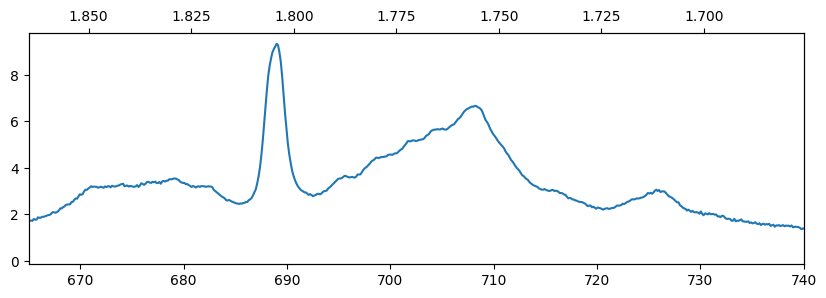

In [34]:
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(spectrum['waves'],spectrum['signal_avg'])
ax.set_xlim(665, 740)
set_lims = ax.get_xlim()
ax2 = ax.twiny()
ax2.set_xlim(1240/set_lims[0],1240/set_lims[1])
plt.show()

In [50]:
np_tensor = np.kron
def S_tot(num_electrons):
    s_e_matrices = list(map(np.array,Jmatrices(S_HALF, high_to_low=False)))
    if num_electrons in S_tot.values:
        print(num_electrons,"shortcut")
        return S_tot.values[num_electrons]
    if num_electrons == 1:
        return s_e_matrices
    if num_electrons == 2:
        S_vec = []
        for se_matrix in s_e_matrices:
            id = sp.eye(2)
            orderings = carrousel(num_electrons)
            S_parts = []
            train = [se_matrix]+[id]*(num_electrons-1)
            for ordering in orderings:
                ordered_train = [train[idx] for idx in ordering]
                op = reduce(np_tensor, ordered_train)
                S_parts.append(op)
            zero_matrix = sp.zeros(op.shape[0])
            S_full = sum(S_parts, zero_matrix)
            S_vec.append(S_full)
        S_tot.values[num_electrons] = S_vec
        return S_vec
    else:
        S_prev = S_tot(num_electrons-1)
        S_final = [np_tensor(S_comp, np.array(sp.eye(2))) + np_tensor(sp.eye(2**(num_electrons-1)), s_comp) for s_comp, S_comp in zip(s_e_matrices, S_prev)]
        S_tot.values[num_electrons] = S_final
        return S_final
S_tot.values = {}


In [55]:
S_tots = {n:S_tot(n) for n in range(1,3)}

2 shortcut


In [56]:
S_squared = {}
for n in range(1,3):
    print(n)
    S_squared[n] = np.sum([np.matmul(s,s) for s in S_tots[n]],axis=0) 

1
2


In [104]:
def trees_dict(l, return_matrix = False):
    '''
    This  function  returns the matrix elements of the l_1⋅l_2 operator in
    the standard basis for two electrons.

    This  can  be  used to evaluate the two-body contribution of the Trees
    effective operator.

    The  keys are given in the format (m1, m2, m1p, m2p) so that the given
    value    in    the    dictionary    equals    the    matrix    element
    <m1,m2|l_1⋅l_2|m1p,m2p>.
    '''
    if l in trees_dict.values:
        return trees_dict.values[l]
    jmats = Jmatrices(l, high_to_low=False)
    trees_mat = 2*sum([TensorProduct(mat1,mat1) for mat1 in jmats], sp.zeros((2*l+1)**2))
    if return_matrix:
        return trees_mat
    mbasis = mrange(l)
    trees_dictionaire = OrderedDict()
    tensor_basis = list(product(mbasis, mbasis))
    for rowidx in range(trees_mat.rows):
        row_thing = tensor_basis[rowidx]
        for colidx in range(trees_mat.cols):
            col_thing = tensor_basis[colidx]
            val = trees_mat[rowidx, colidx]
            if val !=0:
                trees_dictionaire[tuple(row_thing + col_thing)] = val
    trees_dict.values[l] = trees_dictionaire
    return trees_dictionaire
trees_dict.values = {}

In [152]:
trees_dict.values = {}
tree_mat = (trees_dict(S_HALF, return_matrix=True) + sp.S(3)/4*2*sp.eye(4))
display(tree_mat)

Matrix([
[2, 0, 0, 0],
[0, 1, 1, 0],
[0, 1, 1, 0],
[0, 0, 0, 2]])

In [153]:
sp.Matrix(S_squared[2])

Matrix([
[2, 0, 0, 0],
[0, 1, 1, 0],
[0, 1, 1, 0],
[0, 0, 0, 2]])

In [124]:
def spin_double_electron_braket(qet0, qet1):
    '''
    Given  two  qets,  which  are  assumed to be composed of determinantal
    states, and a two electron operator op, return value of the braket

      <qet0| \sum_{i>j=1}^N f_i,j |qet1> 
    
    in terms of brakets of double electron orbitals.

    Parameters
    ----------
    qet0    (qdefcore.Qet): a qet of determinantal states
    qet1    (qdefcore.Qet): a qet of determinantal states

    Returns
    -------
    full_braket  (qdefcore.Qet):  with each key having five symbols, first
    two equal to a two electron orbitals, middle one equal to the provided
    double  electron  operator,  and the last two equal to another pair of
    two  single  electron  orbitals;  interpreted as <φi, φj | (op)* | φk,
    φl>. 
    
    *  The  operator  is omitted and is assumed to be in the middle of the
    four symbols.

    References
    ----------
    -   "Multiplets of Transition-Metal Ions in Crystals", Chapter 3
        Sugano, Tanabe, and Kamimura
    '''

    full_braket = []
    qet0 = qet0.dual()
    landmark = True
    for det0, coeff0 in qet0.dict.items():
        num_electrons = len(det0)
        set0 = set(det0)
        for det1, coeff1 in qet1.dict.items():
            # before giving a value to the braket it is necessary to align the symbols 
            # in the determinantal states and keep track of the reordering sign
            set1 = set(det1)
            common_symbs = list(set0.intersection(set1))
            different_symbs0 = [x for x in det0 if x not in common_symbs]
            different_symbs1 = [x for x in det1 if x not in common_symbs]
            # there are no repeat symbols in any determinantal state
            newdet0 = different_symbs0 + common_symbs
            newdet1 = different_symbs1 + common_symbs
            ordering0 = [det0.index(x) for x in newdet0]
            ordering1 = [det1.index(x) for x in newdet1]
            extra_sign = εijk(*ordering0) * εijk(*ordering1)
            total_coeff = extra_sign * coeff0 * coeff1
            odet0, odet1 = newdet0, newdet1
            double_brakets = []
            comparisons = list(map(lambda x: x[0]==x[1], zip(odet0, odet1)))
            if all(comparisons):
                # CASE I
                for i in range(num_electrons):
                    for j in range(i+1,num_electrons):
                        double_brakets.append(((odet0[i], odet0[j],
                                                odet0[i], odet0[j]),
                                                total_coeff))
                        double_brakets.append(((odet0[i], odet0[j],
                                                    odet0[j], odet0[i]),
                                                    -total_coeff))
            elif (odet0[0] != odet1[0]) and all(comparisons[1:]):
                # CASE II
                for j in range(1,num_electrons):
                    double_brakets.append(((odet0[0], odet0[j],
                                            odet1[0], odet0[j]),
                                            total_coeff))
                    double_brakets.append(((odet0[0], odet0[j],
                                            odet0[j], odet1[0]),
                                            -total_coeff))
            elif (odet0[0] != odet1[0]) and (odet0[1] != odet1[1]) and all(comparisons[2:]): 
                # CASE III
                double_brakets.append(((odet0[0], odet0[1],
                                            odet1[0], odet1[1]),
                                            total_coeff))
                double_brakets.append(((odet0[0], odet0[1],
                                            odet1[1], odet1[0]),
                                            -total_coeff))
            elif not any(comparisons[:3]):
                # CASE IV
                # print("IV")
                double_brakets = []
            else:
                raise Exception("Ooops, This case shouldn't occur")
            full_braket.extend(double_brakets)
    full_braket = sum([Qet({k:v}) for k,v in full_braket],Qet({}))
    return full_braket

def single_electron_braket(qet0, qet1):
    '''
    Given  two qets, assumed to be composed of determinantal states, and a
    single-electron operator return the value of the braket
    
      <qet0| \sum_1^N op_i |qet1>

    in terms of brakets of single electron orbitals.

    Spin is assumed to be integrated in the notation for the symbols where
    a  symbol  that  is  adorned with an upper bar is assumed to have spin
    down and one without to have spin up.

    This function assumes that the operator does not act on spin.

    Parameters
    ----------
    qet0       (qdefcore.Qet): another qet
    qet1       (qdefcore.Qet): a qet
    erase_spin (bool)        : if True then spin bars are removed in output

    Returns
    -------
    full_braket  (qdefcore.Qet): with each key having three symbols, first
    one  equal  to  a  single  electron  orbital,  second one equal to the
    provided  single electron operator, and the third one equal to another
    single electron orbital. Interpreted as <φi | (op)* | φj>.

    *  The  operator  is omitted and is assumed to be in the middle of the
    two symbols.

    References
    ----------
    -   "Multiplets of Transition-Metal Ions in Crystals", Chapter 3
        Sugano, Tanabe, and Kamimura
    '''
    full_braket = []
    qet0 = qet0.dual()
    for det0, coeff0 in qet0.dict.items():
        set0 = set(det0)
        for det1, coeff1 in qet1.dict.items():
            # before  given  value to the braket it is necessary
            # to  align  the symbols in the determinantal states
            # and keep track of the reordering sign
            set1 = set(det1)
            # there should be no repeat symbols in any determinantal state
            assert len(set0) == len(det0) and len(set1) == len(det1), "There's something funny here ..."
            common_symbs = list(set0.intersection(set1))
            different_symbs0 = [x for x in det0 if x not in common_symbs]
            different_symbs1 = [x for x in det1 if x not in common_symbs]
            newdet0 = different_symbs0 + common_symbs
            newdet1 = different_symbs1 + common_symbs
            ordering0 = [det0.index(x) for x in newdet0]
            ordering1 = [det1.index(x) for x in newdet1]
            extra_sign = εijk(*ordering0) * εijk(*ordering1)
            total_coeff = coeff0 * coeff1 * extra_sign
            odet0 = newdet0
            odet1 = newdet1
            comparisons = list(map(lambda x: x[0]==x[1], zip(odet0, odet1)))
            if all(comparisons):
                # CASE I
                single_brakets = [((φ, φ), total_coeff) for φ in odet0]
            elif (odet0[0] != odet1[0]) and all(comparisons[1:]):
                # CASE II
                single_brakets = [((odet0[0],
                                        odet1[0]), total_coeff)]
            elif (odet0[0] != odet1[0]) and (odet0[1] != odet1[1]):
                # CASE III
                single_brakets = []
            else:
                raise Exception("Ooops, This case shouldn't occur")
            full_braket.extend(single_brakets)
    full_braket = sum([Qet({k:v}) for k,v in full_braket],Qet({}))
    return full_braket

In [190]:
def double_electron_braket(qet0, qet1):
    '''
    Given  two  qets,  which  are  assumed to be composed of determinantal
    states, and a two electron operator op, return value of the braket

      <qet0| \sum_{i>j=1}^N f_i,j |qet1> 
    
    in terms of brakets of double electron orbitals.

    This function assumes that the operator does not act on spin.

    Parameters
    ----------
    qet0    (qdefcore.Qet): a qet of determinantal states
    qet1    (qdefcore.Qet): a qet of determinantal states
    strip_spin      (bool): if True then spin bars are removed in output

    Returns
    -------
    full_braket  (qdefcore.Qet):  with each key having five symbols, first
    two equal to a two electron orbitals, middle one equal to the provided
    double  electron  operator,  and the last two equal to another pair of
    two  single  electron  orbitals;  interpreted as <φi, φj | (op)* | φk,
    φl>. 
    
    *  The  operator  is omitted and is assumed to be in the middle of the
    four symbols.

    References
    ----------
    -   "Multiplets of Transition-Metal Ions in Crystals", Chapter 3
        Sugano, Tanabe, and Kamimura
    '''

    full_braket = []
    qet0 = qet0.dual()
    for det0, coeff0 in qet0.dict.items():
        num_electrons = len(det0)
        set0 = set(det0)
        for det1, coeff1 in qet1.dict.items():
            # before giving a value to the braket it is necessary to align the symbols 
            # in the determinantal states and keep track of the reordering sign
            set1 = set(det1)
            common_symbs = list(set0.intersection(set1))
            different_symbs0 = [x for x in det0 if x not in common_symbs]
            different_symbs1 = [x for x in det1 if x not in common_symbs]
            # there are no repeat symbols in any determinantal state
            newdet0 = different_symbs0 + common_symbs
            newdet1 = different_symbs1 + common_symbs
            ordering0 = [det0.index(x) for x in newdet0]
            ordering1 = [det1.index(x) for x in newdet1]
            extra_sign = εijk(*ordering0) * εijk(*ordering1)
            total_coeff = extra_sign * coeff0 * coeff1
            odet0, odet1 = newdet0, newdet1
            double_brakets = []
            comparisons = list(map(lambda x: x[0]==x[1], zip(odet0, odet1)))
            if all(comparisons):
                # CASE I
                for i in range(num_electrons):
                    for j in range(i+1,num_electrons):
                        double_brakets.append(((odet0[i], odet0[j],
                                                odet0[i], odet0[j]),
                                                total_coeff))
                        double_brakets.append(((odet0[i], odet0[j],
                                                    odet0[j], odet0[i]),
                                                    -total_coeff))
            elif (odet0[0] != odet1[0]) and all(comparisons[1:]):
                # CASE II
                for j in range(1,num_electrons):
                    double_brakets.append(((odet0[0], odet0[j],
                                            odet1[0], odet0[j]),
                                            total_coeff))
                    double_brakets.append(((odet0[0], odet0[j],
                                            odet0[j], odet1[0]),
                                            -total_coeff))
            elif (odet0[0] != odet1[0]) and (odet0[1] != odet1[1]) and all(comparisons[2:]): 
                # CASE III
                double_brakets.append(((odet0[0], odet0[1],
                                            odet1[0], odet1[1]),
                                            total_coeff))
                double_brakets.append(((odet0[0], odet0[1],
                                            odet1[1], odet1[0]),
                                            -total_coeff))
            elif not any(comparisons[:3]):
                # CASE IV
                # print("IV")
                double_brakets = []
            else:
                raise Exception("Ooops, This case shouldn't occur")
            full_braket.extend(double_brakets)
    full_braket = sum([Qet({k:v}) for k,v in full_braket],Qet({}))
    return full_braket

def single_electron_braket(qet0, qet1):
    '''
    Given  two qets, assumed to be composed of determinantal states, and a
    single-electron operator return the value of the braket
    
      <qet0| \sum_1^N op_i |qet1>

    in terms of brakets of single electron orbitals.

    Spin is assumed to be integrated in the notation for the symbols where
    a  symbol  that  is  adorned with an upper bar is assumed to have spin
    down and one without to have spin up.

    This function assumes that the operator does not act on spin.

    Parameters
    ----------
    qet0       (qdefcore.Qet): another qet
    qet1       (qdefcore.Qet): a qet
    erase_spin (bool)        : if True then spin bars are removed in output

    Returns
    -------
    full_braket  (qdefcore.Qet): with each key having three symbols, first
    one  equal  to  a  single  electron  orbital,  second one equal to the
    provided  single electron operator, and the third one equal to another
    single electron orbital. Interpreted as <φi | (op)* | φj>.

    *  The  operator  is omitted and is assumed to be in the middle of the
    two symbols.

    References
    ----------
    -   "Multiplets of Transition-Metal Ions in Crystals", Chapter 3
        Sugano, Tanabe, and Kamimura
    '''
    full_braket = []
    qet0 = qet0.dual()
    for det0, coeff0 in qet0.dict.items():
        set0 = set(det0)
        for det1, coeff1 in qet1.dict.items():
            # before  given  value to the braket it is necessary
            # to  align  the symbols in the determinantal states
            # and keep track of the reordering sign
            set1 = set(det1)
            # there should be no repeat symbols in any determinantal state
            assert len(set0) == len(det0) and len(set1) == len(det1), "There's something funny here ..."
            common_symbs = list(set0.intersection(set1))
            different_symbs0 = [x for x in det0 if x not in common_symbs]
            different_symbs1 = [x for x in det1 if x not in common_symbs]
            newdet0 = different_symbs0 + common_symbs
            newdet1 = different_symbs1 + common_symbs
            ordering0 = [det0.index(x) for x in newdet0]
            ordering1 = [det1.index(x) for x in newdet1]
            extra_sign = εijk(*ordering0) * εijk(*ordering1)
            total_coeff = coeff0 * coeff1 * extra_sign
            odet0 = newdet0
            odet1 = newdet1
            comparisons = list(map(lambda x: x[0]==x[1], zip(odet0, odet1)))
            if all(comparisons):
                # CASE I
                single_brakets = [((φ, φ), total_coeff) for φ in odet0]
            elif (odet0[0] != odet1[0]) and all(comparisons[1:]):
                # CASE II
                single_brakets = [((odet0[0],
                                        odet1[0]), total_coeff)]
            elif (odet0[0] != odet1[0]) and (odet0[1] != odet1[1]):
                # CASE III
                single_brakets = []
            else:
                raise Exception("Ooops, This case shouldn't occur")
            full_braket.extend(single_brakets)
    full_braket = sum([Qet({k:v}) for k,v in full_braket],Qet({}))
    return full_braket

In [215]:
def S_squared(num_electrons:int, l:int, sparse: bool = False):
    '''
    Provides the matrix representation of the S^2 operator in the determinantal
    uncoupled basis.

    Parameters
    ----------
    num_electrons  : how  many
    l              : orbital angular momentum of electrons.
    sparse         : whether to return a sparse sympy Matrix.

    Returns
    -------
    s2operator (sp.Matrix)

    '''
    ssquared_dictionaire = trees_dict(S_HALF)
    # Using uncoupled spherical harmonics basis.
    single_e_basis = [SpinOrbital(sp.Symbol('Y_{%d,%d}' % (l,m)), spin) 
                        for spin in [S_DOWN, S_UP] for m in range(-l,l+1)]
    basis_change = OrderedDict([(SpinOrbital(sp.Symbol('Y_{%d,%d}' % (l,m)), spin), Qet({(l,m,spin):1})) 
                        for spin in [S_DOWN, S_UP] for m in range(-l,l+1)])

    def ssquared_op_two_bod(qnums, coeff):
        l1, m1, s1, l2, m2, s2, l1p, m1p, s1p, l2p, m2p, s2p = qnums
        if not(KroneckerDelta(m1,m1p) and KroneckerDelta(m2,m2p)):
            return {}
        else:
            if (s1,s2,s1p,s2p) in ssquared_dictionaire:
                return {1: coeff * ssquared_dictionaire[(s1,s2,s1p,s2p)]}
            else:
                return {}

    def ssquared_op_one_bod(qnums, coeff):
        the_dict = {1:0}
        γ1, γ2 = qnums
        m1 = list(basis_change[γ1].dict.keys())[0][1]
        m2 = list(basis_change[γ2].dict.keys())[0][1]
        s1, s2  = γ1.spin, γ2.spin
        if m1 == m2 and s1 == s2:
            the_dict[1] = coeff * S_HALF * (S_HALF + 1)
        if the_dict[1] == 0:
            return {}
        else:
            return the_dict

    # add spin up and spin down
    single_e_spin_orbitals = single_e_basis
    # create determinantal states
    slater_dets = list(combinations(single_e_spin_orbitals, num_electrons))
    slater_qets = [Qet({k:1}) for k in slater_dets]

    if sparse:
        s2operator = {}
    else:
        s2operator = []

    for idx0, qet0 in enumerate(slater_qets):
        row = []
        for idx1, qet1 in enumerate(slater_qets):
            double_braket = double_electron_braket(qet0, qet1)
            double_braket = double_braket_basis_change(double_braket, basis_change)
            ssquared_matrix_element_twobody = sp.expand(double_braket.apply(ssquared_op_two_bod).as_symbol_sum())
            single_braket = single_electron_braket(qet0, qet1)
            ssquared_matrix_element_onebod = single_braket.apply(ssquared_op_one_bod).as_symbol_sum()
            matrix_element = (ssquared_matrix_element_twobody + ssquared_matrix_element_onebod)
            if matrix_element != 0:
                if sparse:
                    s2operator[(idx0,idx1)] = (matrix_element)
                else:
                    row.append(matrix_element)
            else:
                if not sparse:
                    row.append(matrix_element)
        if not sparse:
            s2operator.append(row)

    if sparse:
        s2operator = (sp.SparseMatrix(len(slater_qets), len(slater_qets), s2operator))
    else:
        s2operator = sp.Matrix(s2operator)
    return s2operator


In [216]:
s2operators = {}
for n in range(1,10):
    print(n)
    s2operators[n] = S_squared(n,2,sparse=True)

1
2
3
4
5
6
7
8
9


In [208]:
pickle.dump({n:sp.Matrix(s2operators[n]) for n in s2operators}, open('./data/s2ops.pkl','wb'))

In [207]:
pickle.dump(s2operators, open('./data/s2ops.pkl','wb'))

In [213]:
pickle.load(open('./data/s2ops.pkl','rb'))[3]

Matrix([
[15/4,    0,    0,   0,   0,   0,   0,   0,    0,    0,   0,   0,   0,   0,   0,    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,    0,    0,   0,   0,   0,   0,   0,    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
[   0, 15/4,    0,   0,   0,   0,   0,   0,    0,    0,   0,   0,   0,   0,   0,    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,    0,    0,   0,   0,   0,   0,   0,    0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,    0,   0,   0,   0,   0,   0,   0,   0

In [188]:
!beep

In [193]:
for n in range(1,3):
    print(s2operators[n].eigenvals())

{3/4: 10}
{2: 30, 0: 15}


In [189]:
for n in range(1,3):
    print(s2operators[n].eigenvals())

{3/4: 10}
{2: 30, 0: 15}
{15/4: 40, 3/4: 80}
{6: 25, 2: 135, 0: 50}
{35/4: 6, 15/4: 96, 3/4: 150}
{6: 25, 2: 135, 0: 50}
{15/4: 40, 3/4: 80}
{2: 30, 0: 15}
{3/4: 10}
